In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

import utils
import forward_model
import globals
import nesterov
import section_search
import coordinate_descent
import dataset_loader
import initialization

import torch

/home/holly/Documents/depth-from-defocus/dfd/dfd-sparse/lib/python3.12/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


Df: [ 1.  2.  4.  8. 16. 32. 64.]


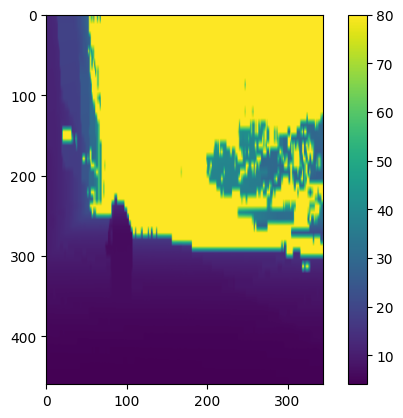

adaptive kernel size set to 17
1.5456521739130434e-07


In [ ]:
globals.init_Make3D()

IMAGE_RANGE = 255.

gt_aif, gt_dpt = dataset_loader.load_single_sample_Make3D(img_name='img-060705-17.10.14-p-018t000.jpg',data_dir = "data")

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height, _ = gt_aif.shape
max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

print(globals.ps)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.032234844..1.0000007].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04080772..1.0000005].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03336455..1.0000006].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.025699861..1.0000005].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030004937..1.0000006].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.027818687..1.0000004].


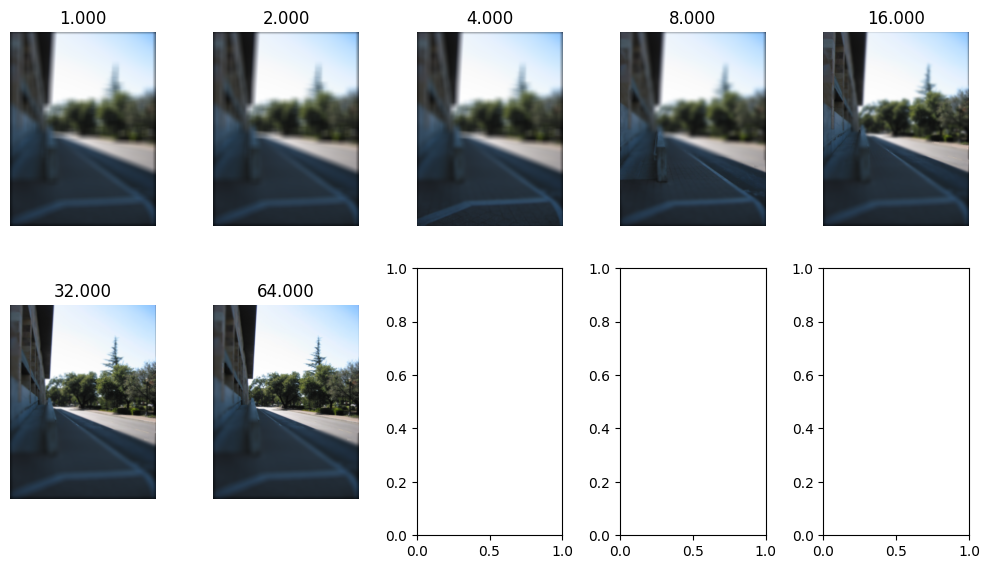

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.033364534..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030004922..1.0000001].


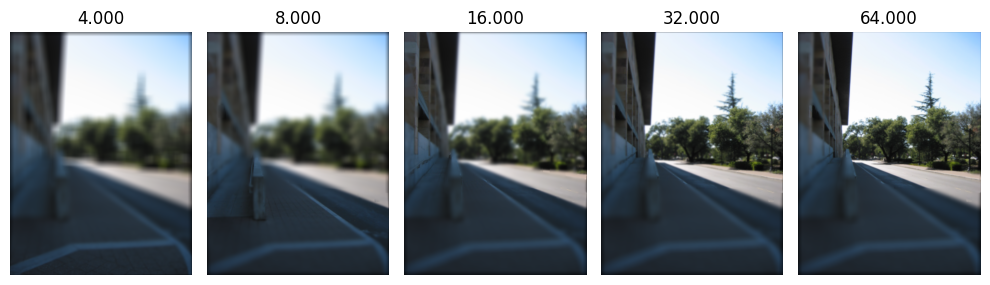

In [ ]:
# forward model (torch)
# FORWARD_KERNEL_TYPE = 'gaussian'
defocus_stack = forward_model.forward(gt_dpt, gt_aif)
# defocus_stack_torch = forward_model.forward_torch(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)#.float() / 255.0)
utils.plot_single_stack(defocus_stack / IMAGE_RANGE, globals.Df)

utils.plot_single_stack(defocus_stack[2:] / IMAGE_RANGE, globals.Df[2:])

# import math
# recon = defocus_stack[2:] / IMAGE_RANGE
# setting = globals.Df[2:]
# recon_max = None

# num_images = len(recon)
# cols = 5
# rows = math.ceil(len(recon) / cols)

# fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 3))
# if rows == 1:
#     axes = np.array([axes])  # make it a list for consistency
# axes = axes.flatten()

# for i in range(num_images):
#     if recon_max is None:
#         recon_max = recon[i].max()
#     axes[i].imshow(recon[i] / recon_max)
#     axes[i].axis('off')
#     axes[i].set_title(f"{setting[i]:.0f} m")

# # if title:
# #     fig.suptitle(title)

# plt.tight_layout()
# plt.savefig("focal_stack_example.png", dpi=800, bbox_inches="tight", pad_inches=0)
# plt.show()

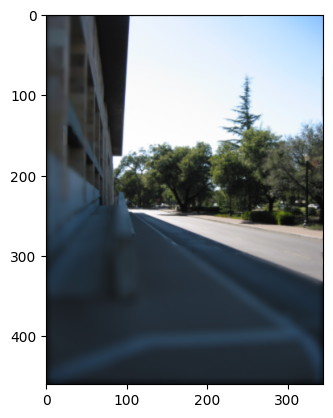

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.032234825..1.0000001].


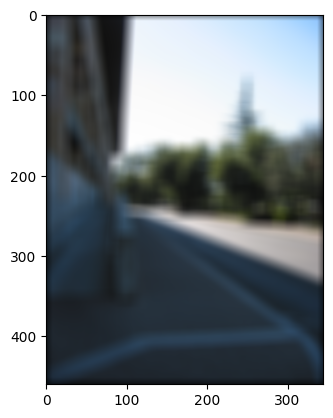

In [4]:
# AIF initialization

# aif_init = initialization.trivial_aif_initialization(defocus_stack)
aif_init = initialization.compute_aif_initialization(defocus_stack, lmbda=0.05,
                                                     sharpness_measure='sobel_grad')
plt.imshow(aif_init / IMAGE_RANGE)
plt.show()

plt.imshow(defocus_stack[1] / IMAGE_RANGE)
plt.show()

Depth range: [ 0.01 - 80 ]
Created experiment folder: experiments/make3d_2026-02-12_21-01-30
Images in range [0-255]


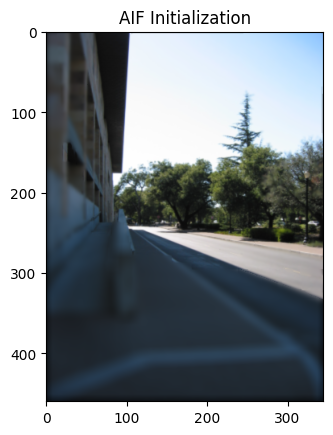

Iteration 0 



Grid search         : 100%|███████████████████| 100/100 [01:12<00:00,  1.38it/s]


GRID SEARCH DURATION 72.57990860939026


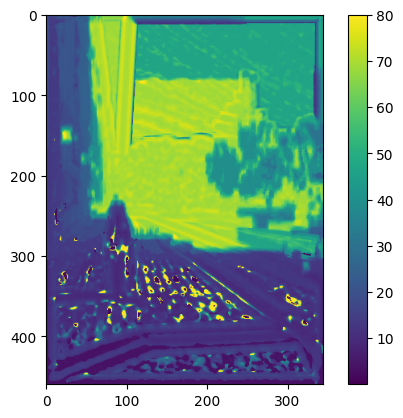


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 109.95399904251099


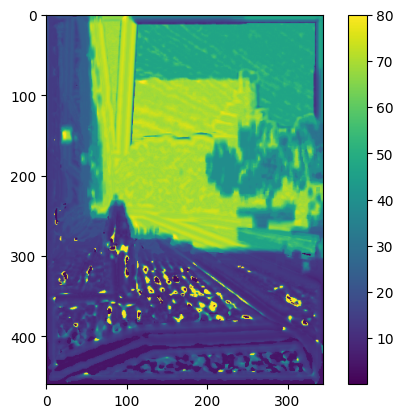

Loss: 10.596325 , TV: 567325.4

DPT result range: [ 0.013284686 , 79.99672 ]


Bounded FISTA...


Optimizing: 100%|██████████| 10/10 [00:25<00:00,  2.51s/it]


r1norm 2379.2812 norm(x) 93128.71
FISTA duration 44.372814655303955

AIF result range: [ 6.6752367 , 255.0 ]
Loss: 1.6695174 , TV: 3440592.0


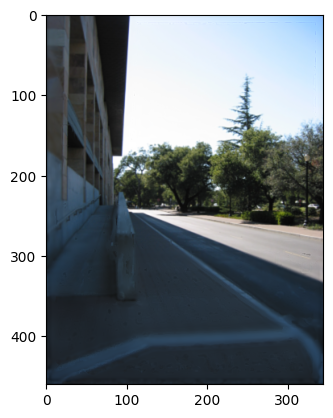

FULL ITER DURATION 236.5648136138916
T_i updated to 20


--------------------------

Iteration 1 



Grid search         : 100%|███████████████████| 100/100 [01:17<00:00,  1.28it/s]


GRID SEARCH DURATION 78.1143126487732


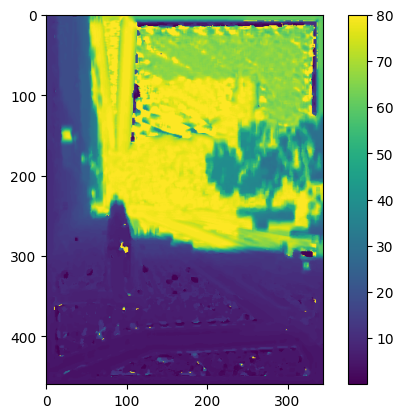


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 119.54590582847595


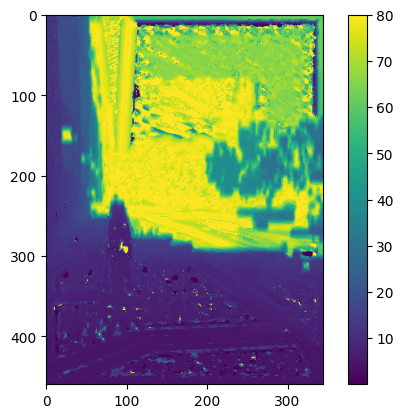

Loss: 0.68902826 , TV: 615317.25

DPT result range: [ 0.013284686 , 79.99672 ]


Bounded FISTA...


Optimizing: 100%|██████████| 20/20 [00:49<00:00,  2.49s/it]


r1norm 867.03265 norm(x) 93250.65
FISTA duration 68.89854049682617

AIF result range: [ 6.8487163 , 255.0 ]
Loss: 0.22432232 , TV: 3786608.0


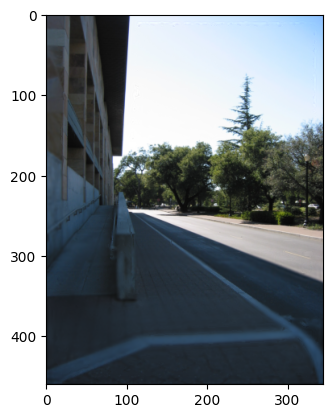

FULL ITER DURATION 276.47974824905396
T_i updated to 40


--------------------------

Iteration 2 



Grid search         : 100%|███████████████████| 100/100 [01:23<00:00,  1.20it/s]


GRID SEARCH DURATION 83.49447894096375


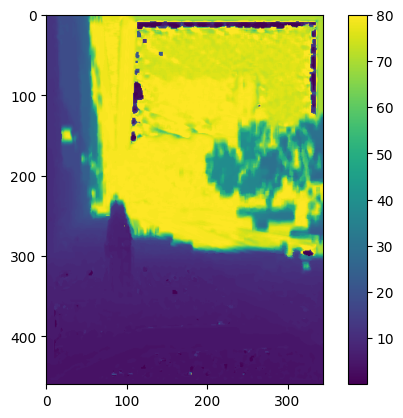


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 120.41788792610168


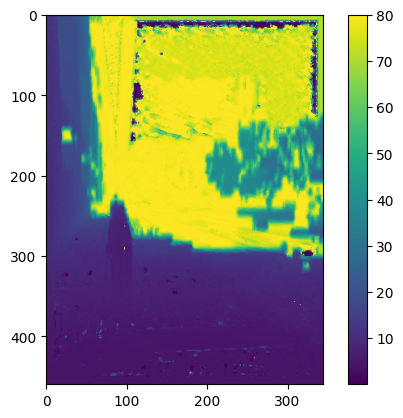

Loss: 0.12799248 , TV: 444989.4

DPT result range: [ 0.013284686 , 79.99672 ]


Bounded FISTA...


Optimizing: 100%|██████████| 40/40 [01:41<00:00,  2.54s/it]


r1norm 528.9932 norm(x) 93278.05
FISTA duration 121.08346152305603

AIF result range: [ 6.8890576 , 255.0 ]
Loss: 0.083925106 , TV: 3781820.0


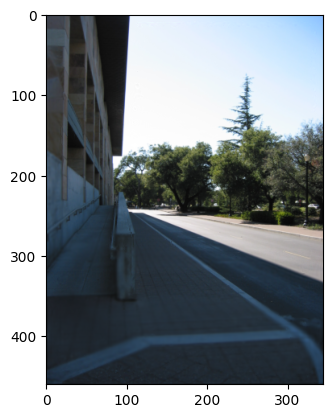

FULL ITER DURATION 334.90557956695557
T_i updated to 80


--------------------------

Iteration 3 



Grid search         : 100%|███████████████████| 100/100 [01:27<00:00,  1.14it/s]


GRID SEARCH DURATION 87.68529438972473


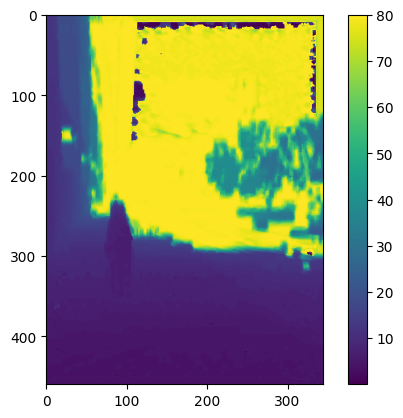


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 123.56343603134155


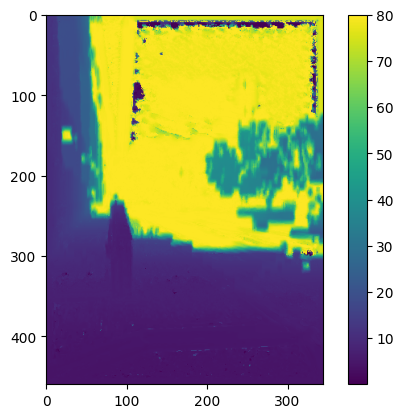

Loss: 0.06824081 , TV: 369516.16

DPT result range: [ 0.013284686 , 79.99672 ]


Bounded FISTA...


Optimizing: 100%|██████████| 80/80 [03:28<00:00,  2.61s/it]


r1norm 446.92114 norm(x) 93291.914
FISTA duration 228.81939959526062

AIF result range: [ 6.8732595 , 255.0 ]
Loss: 0.059933476 , TV: 3856274.0


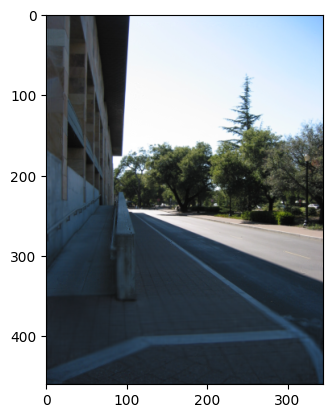

FULL ITER DURATION 449.920503616333
T_i updated to 160


--------------------------

Iteration 4 



Grid search         : 100%|███████████████████| 100/100 [01:28<00:00,  1.14it/s]


GRID SEARCH DURATION 88.16774821281433


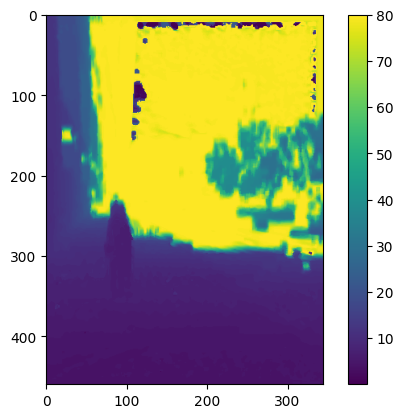


Golden-section search...
...searching for 100 % convergence
...done
GSS DURATION 124.86871147155762


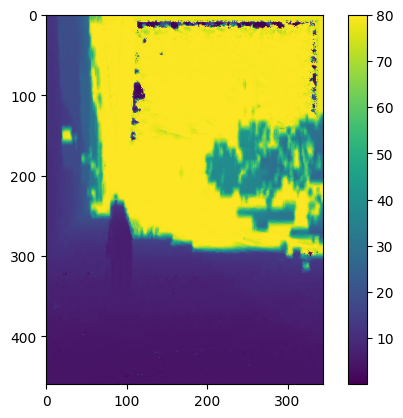

Loss: 0.056241304 , TV: 331091.94

DPT result range: [ 0.017344784 , 79.99672 ]


Bounded FISTA...


Optimizing: 100%|██████████| 160/160 [07:07<00:00,  2.67s/it]


r1norm 424.31693 norm(x) 93299.22
FISTA duration 447.13531017303467

AIF result range: [ 6.884988 , 255.0 ]
Loss: 0.05402538 , TV: 3955289.2


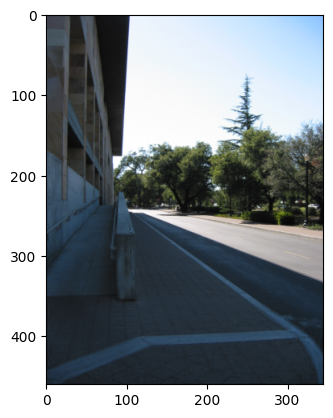

FULL ITER DURATION 670.3146548271179
T_i updated to 320


--------------------------



In [5]:
# -------------------
# COORDINATE DESCENT
# -------------------

globals.window_size = 5
# depth_init = 40

dpt, aif, _, _ = coordinate_descent.coordinate_descent(defocus_stack,
        experiment_folder='experiments',
        show_plots=True, save_plots=False,
        experiment_name = 'make3d', num_epochs = 5,
        # least_squares_first=True, depth_init=depth_init,
        nesterov_first=False, aif_init = aif_init,                                             
        # k = 1, aif_method = 'fista',
        num_Z = 100, 
        T_0 = 10, alpha = 2, 
        # min_Z = globals.min_Z, max_Z = globals.max_Z,
        # vmin = globals.min_Z, vmax = globals.max_Z,
                                                       verbose = True,
        windowed_mse = True)


In [ ]:
# experiment_folder = '/data/holly_jackson/experiments/make3d_2025-11-06_00-12-20'
# utils.save_dpt_npy(experiment_folder, 'dpt', dpt)
# utils.save_aif(experiment_folder, 'aif', aif)
# dpt_loaded = utils.load_dpt_npy(experiment_folder, 'dpt')
# aif_loaded = utils.load_aif(experiment_folder, 'aif')
# assert np.array_equal(dpt, dpt_loaded)
# assert np.array_equal(aif, aif_loaded)


In [ ]:
print('RMS', utils.compute_RMS(dpt, gt_dpt_resized))
print('Rel', utils.compute_Rel(dpt, gt_dpt_resized))
print(utils.compute_accuracy_metrics(dpt, gt_dpt_resized))

utils.plot_compare_greyscale(dpt, gt_dpt_resized, vmin=globals.min_Z, vmax=globals.max_Z)


# todo: fista check if A @ x is quicker stacked or in loop

In [ ]:
worst_coords = utils.get_worst_diff_pixels(dpt, gt_dpt_resized, num_worst_pixels=10, vmin=gt_dpt.min(), vmax=gt_dpt.max())

k = 10  # top-k best (smallest diffs)

diff = np.abs(dpt - gt_dpt_resized)
flat = diff.ravel()

# k smallest indices (unsorted), then sort them by value ascending
best_idx = np.argpartition(flat, k)[:k]
best_idx = best_idx[np.argsort(flat[best_idx])]

# 2D coordinates (row, col), sorted by increasing diff
rows, cols = np.unravel_index(best_idx, diff.shape)
best_coords = list(zip(rows, cols))

In [ ]:
depth_maps, Z, k_min_indices, all_losses = section_search.grid_search_opt_k(
    aif, defocus_stack,
    indices = None, min_Z = globals.min_Z, max_Z = globals.max_Z, num_Z = 100, k = 1)

print(k_min_indices.shape)

In [ ]:
dpt = np.array([[globals.min_Z]], dtype=np.float32)
r = forward_model.computer(dpt, globals.Df)[...,None,None]
# print(r)

print(globals.Df, globals.D, globals.f)
Df_expanded = globals.Df.reshape(1, 1, -1)
CoC = ((globals.D) 
        * (np.abs(dpt[...,None] - Df_expanded) / (dpt[...,None]+1e-8)) 
        * (globals.f / np.abs(Df_expanded - globals.f)))
r = CoC / 2. / globals.ps
print(CoC)
print(r)

In [ ]:
i, j = 100, 100
utils.plot_grid_search_on_pixel(i, j, Z, all_losses,
                                k_min_indices=k_min_indices[i,j])

In [ ]:
for i, j in worst_coords:
    utils.plot_grid_search_on_pixel(i, j, Z, all_losses, gt_dpt=gt_dpt_resized,
                                k_min_indices=k_min_indices[i,j])

for i, j in best_coords:
    utils.plot_grid_search_on_pixel(i, j, Z, all_losses, gt_dpt=gt_dpt_resized,
                                k_min_indices=k_min_indices[i,j])
    

In [ ]:
# instead of min loss what if we found area with highest magnitude second derivative 


In [ ]:
def strongest_curvature_region(i, j, all_losses, window=11):
    window = int(window)
    if window < 1:
        raise ValueError("window must be >= 1")
    if window % 2 == 0:
        window += 1
        
    losses = all_losses[i, j]
    d2 = np.gradient(np.gradient(losses))

    kernel = np.ones(window) / window
    avg_d2 = np.convolve(d2, kernel, mode="valid")

    # region with most negative average curvature
    start_valid = (window - 1) // 2
    center_offset = int(np.argmin(avg_d2))
    idx_center_region = start_valid + center_offset
    
    return idx_center_region

for i, j in worst_coords:
    idx_max_point, idx_min_point = strongest_curvature_region(i, j, all_losses, Z)
    print(Z[idx_max_point], Z[idx_min_point])